In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge,Lasso ,RidgeCV,LassoCV , ElasticNet , ElasticNetCV,LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv("cluster02.csv",index_col=0)

In [3]:
df["lable_cluster"].value_counts()

1    36462
Name: lable_cluster, dtype: int64

In [4]:
# droping unnecessary columns
df.drop(["lable_cluster"],axis=1,inplace=True)

In [5]:
df = df.reset_index(drop=True)

In [6]:
df.head()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,preferred_foot,attacking_work_rate,defensive_work_rate,experience_no_of_days
0,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,66.0,5.0,10.0,9.0,7.0,7.0,0,0,0,5503
1,54.0,65.0,58.0,40.0,52.0,45.0,30.0,44.0,41.0,43.0,...,63.0,13.0,6.0,8.0,8.0,11.0,1,0,0,4218
2,51.0,64.0,57.0,39.0,51.0,44.0,30.0,43.0,41.0,42.0,...,63.0,6.0,22.0,45.0,22.0,22.0,1,0,0,4407
3,52.0,65.0,58.0,40.0,52.0,45.0,30.0,44.0,41.0,43.0,...,63.0,6.0,22.0,46.0,22.0,22.0,1,0,0,4583
4,47.0,60.0,22.0,48.0,52.0,39.0,30.0,26.0,41.0,26.0,...,63.0,6.0,22.0,49.0,22.0,22.0,1,0,0,4772


In [7]:
df.shape

(36462, 39)

In [8]:
# # For data analysis
# from pandas_profiling import ProfileReport
# pf=ProfileReport(df)
# pf.to_file("report of cluster 02.html")

In [9]:
# Drop duplicate row
df.drop_duplicates(inplace=True)

In [10]:
df.describe()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,preferred_foot,attacking_work_rate,defensive_work_rate,experience_no_of_days
count,36447.000000,36447.000000,36447.000000,36447.000000,36447.000000,36447.000000,36447.000000,36447.000000,36447.000000,36447.000000,...,36447.000000,36447.000000,36447.000000,36447.000000,36447.000000,36447.000000,36447.000000,36447.000000,36447.000000,36447.000000
mean,66.678739,74.007655,52.762998,48.519302,56.204571,59.518205,48.607781,55.748813,50.417439,47.716959,...,47.176997,14.520976,21.402036,43.289818,21.424918,21.832250,0.238044,0.339918,0.379839,4898.535270
std,8.459949,7.586363,17.522306,19.707663,17.181596,15.468191,19.470414,18.382219,18.628318,18.108787,...,22.247161,17.903029,15.691150,24.514766,15.722839,16.906681,0.425892,0.677111,0.720950,484.525239
min,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,4.000000,1.000000,...,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,4218.000000
25%,61.000000,69.000000,41.000000,32.000000,47.000000,52.000000,34.000000,45.000000,38.000000,35.000000,...,25.000000,7.000000,12.000000,14.000000,12.000000,12.000000,0.000000,0.000000,0.000000,4407.000000
50%,67.000000,74.000000,56.000000,50.000000,59.000000,62.000000,52.000000,60.000000,53.000000,48.000000,...,52.000000,9.000000,20.000000,51.000000,21.000000,21.000000,0.000000,0.000000,0.000000,4948.000000
75%,73.000000,79.000000,66.000000,65.000000,68.000000,70.000000,64.000000,69.000000,64.000000,61.000000,...,67.000000,13.000000,22.000000,64.000000,22.000000,22.000000,0.000000,1.000000,1.000000,5503.000000
max,93.000000,95.000000,95.000000,97.000000,98.000000,97.000000,91.000000,97.000000,92.000000,97.000000,...,94.000000,94.000000,93.000000,97.000000,96.000000,96.000000,1.000000,4.000000,4.000000,5503.000000


# outlier treatment 

In [11]:
#no outlier is here because all rating range between 0 to 100 expect exp no of days
for i in df.columns:
    print(max(df[i]))

93.0
95.0
95.0
97.0
98.0
97.0
91.0
97.0
92.0
97.0
97.0
97.0
96.0
97.0
96.0
96.0
95.0
97.0
94.0
96.0
96.0
96.0
97.0
96.0
95.0
96.0
95.0
94.0
95.0
94.0
94.0
93.0
97.0
96.0
96.0
1
4
4
5503


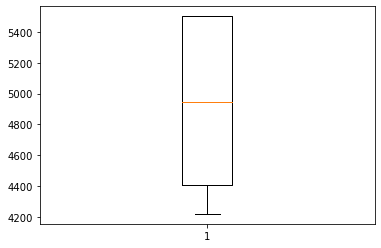

In [12]:
# Creating plot
plt.boxplot(df["experience_no_of_days"])
 
# show plot
plt.show()

# Multicolinearity check

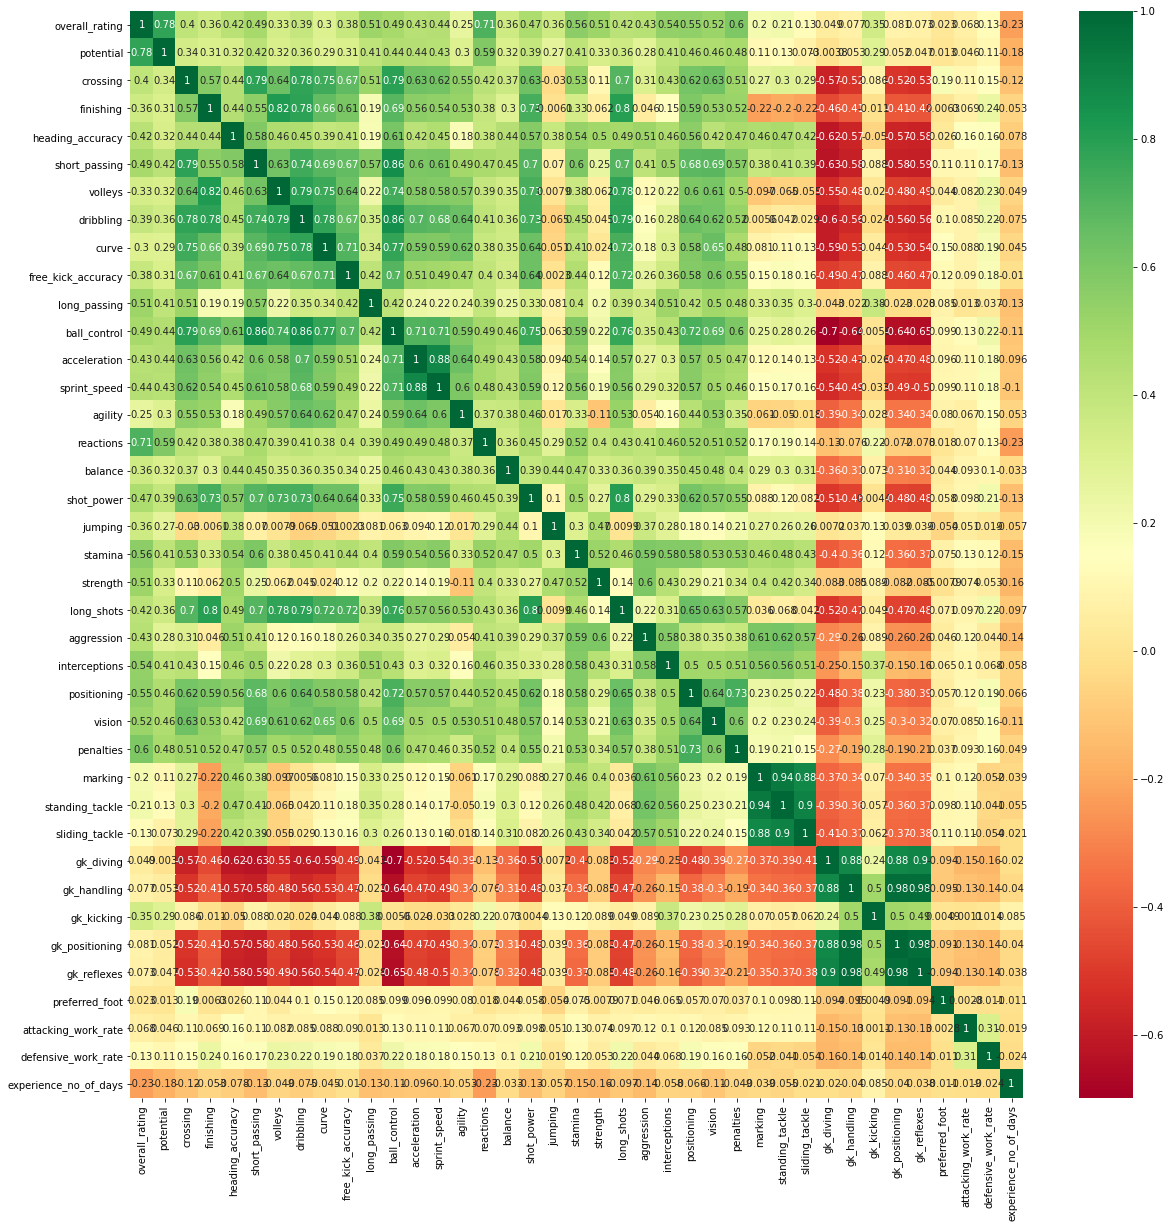

In [20]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.savefig('corr_cluster_1.png')

In [13]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr


In [14]:
# more than .9 corelation so multicolinearity exist so we drop this column 
corr_features = correlation(df, 0.9)


corr_features

{'gk_positioning', 'gk_reflexes', 'sliding_tackle', 'standing_tackle'}

In [15]:
len(set(corr_features))

4

In [16]:
df.drop(corr_features,axis=1,inplace=True)

In [17]:
df.shape

(36447, 35)

<AxesSubplot:xlabel='reactions', ylabel='overall_rating'>

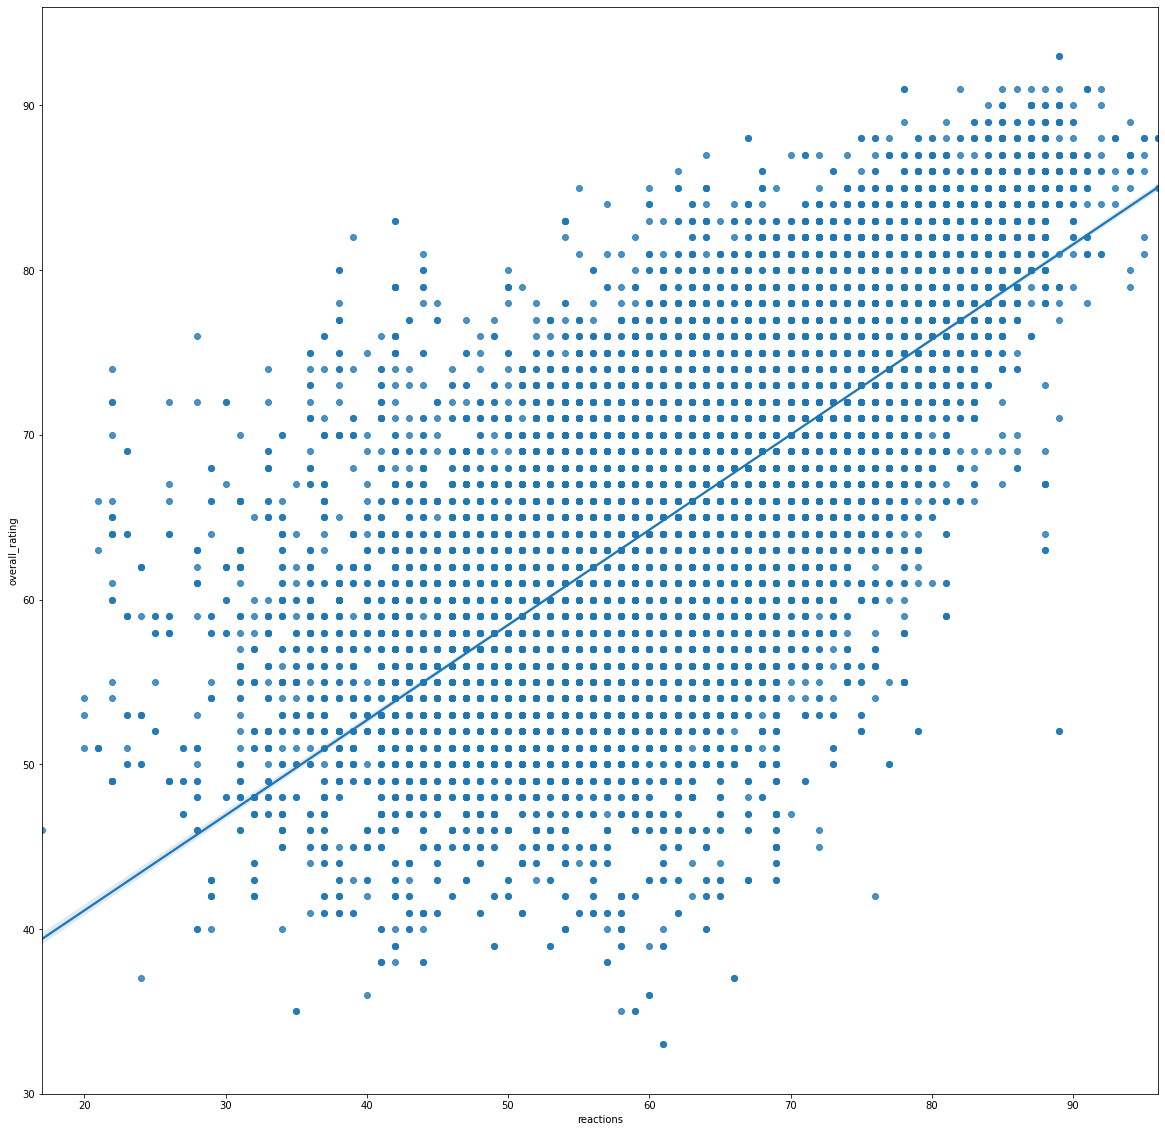

In [18]:
plt.figure(figsize=(20,20))
sns.regplot(x=df["reactions"], y=df["overall_rating"], data=df)

<AxesSubplot:xlabel='potential', ylabel='overall_rating'>

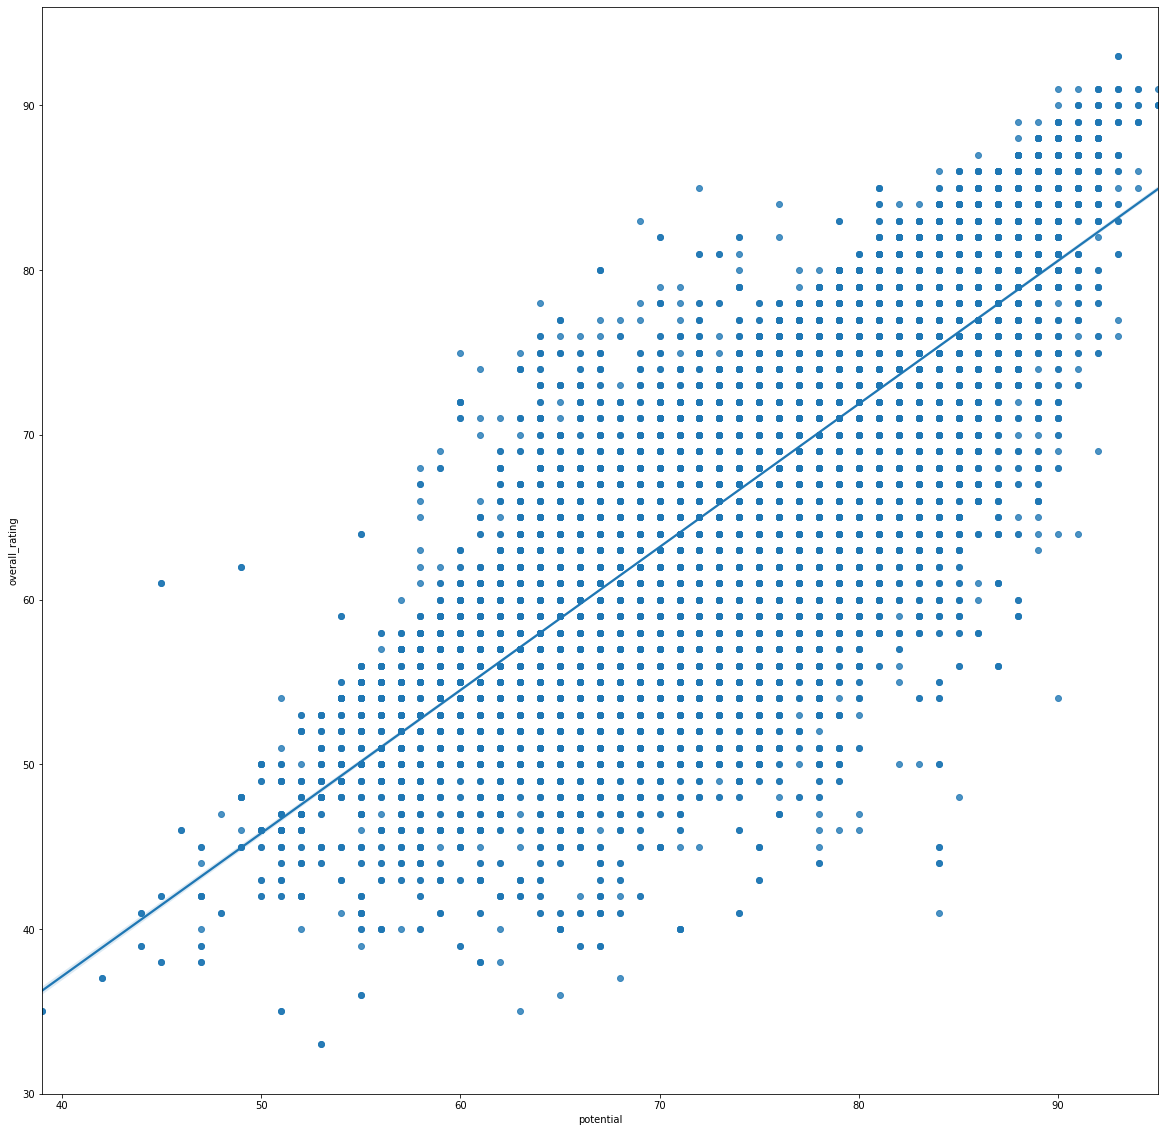

In [19]:
plt.figure(figsize=(20,20))
sns.regplot(x=df["potential"], y=df["overall_rating"], data=df)

In [20]:
x=df.drop("overall_rating",axis=1)
y=df["overall_rating"]

In [21]:
x_train, x_test, y_train,y_test = train_test_split(x, y,test_size= 0.2,random_state = 100)

In [22]:
lr = LinearRegression()
lr.fit(x_train,y_train)
print("R2-->",lr.score(x_test,y_test))

def adj_r2(x,y):
    r2 = lr.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2
print("adj R2-->",adj_r2(x_test,y_test))

R2--> 0.8592999104903646
adj R2--> 0.8586405303327729


In [23]:
lassocv = LassoCV(alphas=None,cv= 50 , max_iter=200000, normalize=True)
lassocv.fit(x_train,y_train)
lasso = Lasso(alpha=lassocv.alpha_)
lasso.fit(x_train,y_train)
lasso.score(x_test,y_test)

0.8592997033981202

In [24]:
def adj_r2_lasso(x,y):
    r2 = lasso.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2
print("adj R2-->",adj_r2_lasso(x_test,y_test))

adj R2--> 0.8586403222700066


In [25]:
ridgecv = RidgeCV(alphas=np.random.uniform(0,1000,50),cv = 10 , normalize=True)
ridgecv.fit(x_train,y_train)
ridge_lr = Ridge(alpha=ridgecv.alpha_)
ridge_lr.fit(x_train,y_train)
ridge_lr.score(x_test,y_test)

0.8592998143270231

In [26]:
ridgecv.alpha_

35.13263844037118

In [27]:
def adj_r2_ridge(x,y):
    r2 = ridge_lr.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2
print("adj R2-->",adj_r2_ridge(x_test,y_test))

adj R2--> 0.8586404337187693


In [28]:
elastic= ElasticNetCV(alphas=None, cv = 10 )
elastic.fit(x_train,y_train)
elastic_lr = ElasticNet(alpha=elastic.alpha_ , l1_ratio=elastic.l1_ratio_)
elastic_lr.fit(x_train,y_train)
elastic_lr.score(x_test,y_test)

0.8566682824920143

In [29]:
def adj_r2_elastic(x,y):
    r2 = elastic_lr.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2
print("adj R2-->",adj_r2_elastic(x_test,y_test))

adj R2--> 0.8559965694120321


In [30]:
print("LINEAR REG R2->",lr.score(x_test,y_test) ,"ADJ R2->",adj_r2(x_test,y_test) )
print("RIDGE REG R2->",ridge_lr.score(x_test,y_test) ,"ADJ R2->",adj_r2_ridge(x_test,y_test) )
print("LASSO REG R2->",lasso.score(x_test,y_test) ,"ADJ R2->",adj_r2_lasso(x_test,y_test) )
print("ELASTIC REG R2->",elastic_lr.score(x_test,y_test) ,"ADJ R2->", adj_r2_elastic(x_test,y_test))

LINEAR REG R2-> 0.8592999104903646 ADJ R2-> 0.8586405303327729
RIDGE REG R2-> 0.8592998143270231 ADJ R2-> 0.8586404337187693
LASSO REG R2-> 0.8592997033981202 ADJ R2-> 0.8586403222700066
ELASTIC REG R2-> 0.8566682824920143 ADJ R2-> 0.8559965694120321


In [39]:
ridge_lr.score(x_train,y_train)

0.8559618133482422

In [40]:
#we choose lasso for cluster 0 model
import pickle
pickle.dump(ridge_lr,open('model_ridge_cluster_0.pickle','wb'))

In [1]:
import pickle
loaded_model = pickle.load(open("model_ridge_cluster_0.pickle", 'rb'))

In [2]:
loaded_model.predict([[65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,5.0,10.0,9.0,0.0,0.0,0.0,5503.0]])

C:\Users\Sagnik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


array([57.00916743])

In [3]:
for i in range(0,36):
    print(45)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35


In [42]:
df

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,vision,penalties,marking,gk_diving,gk_handling,gk_kicking,preferred_foot,attacking_work_rate,defensive_work_rate,experience_no_of_days
0,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,53.0,47.0,62.0,5.0,10.0,9.0,0,0,0,5503
1,54.0,65.0,58.0,40.0,52.0,45.0,30.0,44.0,41.0,43.0,...,38.0,35.0,53.0,13.0,6.0,8.0,1,0,0,4218
2,51.0,64.0,57.0,39.0,51.0,44.0,30.0,43.0,41.0,42.0,...,38.0,28.0,52.0,6.0,22.0,45.0,1,0,0,4407
3,52.0,65.0,58.0,40.0,52.0,45.0,30.0,44.0,41.0,43.0,...,38.0,29.0,53.0,6.0,22.0,46.0,1,0,0,4583
4,47.0,60.0,22.0,48.0,52.0,39.0,30.0,26.0,41.0,26.0,...,38.0,29.0,53.0,6.0,22.0,49.0,1,0,0,4772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36457,83.0,85.0,84.0,77.0,59.0,89.0,77.0,84.0,86.0,78.0,...,88.0,83.0,22.0,9.0,20.0,84.0,0,0,2,4583
36458,78.0,80.0,74.0,76.0,53.0,84.0,77.0,85.0,86.0,74.0,...,88.0,70.0,32.0,9.0,20.0,73.0,0,0,2,4772
36459,77.0,80.0,74.0,71.0,53.0,84.0,77.0,85.0,86.0,74.0,...,88.0,70.0,32.0,9.0,20.0,73.0,0,0,2,4948
36460,78.0,81.0,74.0,64.0,57.0,86.0,77.0,87.0,86.0,73.0,...,88.0,53.0,28.0,9.0,20.0,73.0,0,0,2,5314


In [50]:
l=[]
for i in df.columns:
    l.append(i)

In [51]:
l

['overall_rating',
 'potential',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'dribbling',
 'curve',
 'free_kick_accuracy',
 'long_passing',
 'ball_control',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'marking',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'preferred_foot',
 'attacking_work_rate',
 'defensive_work_rate',
 'experience_no_of_days']

In [ ]:
potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,gk_diving,gk_handling,gk_kicking,preferred_foot,attacking_work_rate,defensive_work_rate,experience_no_of_days